In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#create function to connect the database
def Create_db_connection(host_name,user_name,user_password ,db_name):
    connection = None
    try:
        connection=mysql.connector.connect(
        host = host_name,
        user = user_name,
        passwd = user_password,
        database=db_name)
        print('Mysql Database connection successful')
    except Error as err:
        print('Error: ' , err)
    return connection

In [3]:
# connect to the database
host = 'relational.fit.cvut.cz'
user = 'guest'
pw = 'relational'
db = 'financial'
connection = Create_db_connection(host , user , pw , db)

Mysql Database connection successful


In [4]:
# create function to read the query 
def read_query(connection,query):
    cursor = connection.cursor()
    result=None
    try:
        cursor.execute(query)
        result=cursor.fetchall()
        return result
    except Error as err:
        print(f"Error :" , err)

In [5]:
connection

In [6]:
# read table account
q1 = """
SELECT * FROM financial.account;
"""
account = read_query(connection,q1)
columns=['account_id','district_id','frequency','date']
account_df = pd.DataFrame(account , columns=columns )
account_df.head()

,account_id,district_id,frequency,date
0,1,18,POPLATEK MESICNE,1995-03-24
1,2,1,POPLATEK MESICNE,1993-02-26
2,3,5,POPLATEK MESICNE,1997-07-07
3,4,12,POPLATEK MESICNE,1996-02-21
4,5,15,POPLATEK MESICNE,1997-05-30


In [7]:
# read table card
q2 = """
SELECT * FROM financial.card;
"""
card = read_query(connection,q2)
columns=['card_id','disp_id','type','issued']
card_df = pd.DataFrame(card , columns=columns )
card_df.head()

,card_id,disp_id,type,issued
0,1,9,gold,1998-10-16
1,2,19,classic,1998-03-13
2,3,41,gold,1995-09-03
3,4,42,classic,1998-11-26
4,5,51,junior,1995-04-24


In [8]:
# read table client
q3 = """
SELECT * FROM financial.client;
"""
client = read_query(connection,q3)
columns=['client_id','gender','birth_date','district_id']
client_df = pd.DataFrame(client , columns=columns )
client_df.head()

,client_id,gender,birth_date,district_id
0,1,F,1970-12-13,18
1,2,M,1945-02-04,1
2,3,F,1940-10-09,1
3,4,M,1956-12-01,5
4,5,F,1960-07-03,5


In [9]:
# read table disp
q4= """
SELECT * FROM financial.disp;
"""
disp = read_query(connection,q4)
columns=['disp_id','client_id','account_id','type']
disp_df = pd.DataFrame(disp , columns=columns )
disp_df.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [43]:
# read table district
q5= """
SELECT * FROM financial.district;"""
district = read_query(connection,q5)
columns=['district_id','district name','region','no. of inhabitants',
         'no_of_municipalities_inhabitants < 499','no_municipalities_inhabitants 500-1999',
         'no_municipalities_inhabitants 2000-9999','no_municipalities with inhabitants >10000',
         'no_cities','ratio_urban_inhabitants','avg_salary','unemploymant_rate_95'
         ,'unemploymant_rate_96','no_enterpreneurs_per_1000_inhabitants','no_commited_crimes_95'
         ,'no_of_commited_crimes_96']
district_df = pd.DataFrame(district , columns=columns )
district_df.head()

,district_id,district name,region,no. of inhabitants,no_of_municipalities_inhabitants < 499,no_municipalities_inhabitants 500-1999,no_municipalities_inhabitants 2000-9999,no_municipalities with inhabitants >10000,no_cities,ratio_urban_inhabitants,avg_salary,unemploymant_rate_95,unemploymant_rate_96,no_enterpreneurs_per_1000_inhabitants,no_commited_crimes_95,no_of_commited_crimes_96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.6,1.85,132,2159.0,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.9,2.21,111,2824.0,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.6,5.05,109,5244.0,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.8,4.43,118,2616.0,3040


In [11]:
# read table loan
q6= """
SELECT * FROM financial.loan;
"""
loan = read_query(connection,q6)
columns=['loan_id','account_id','date','amount','duration','payments','status']
loan_df = pd.DataFrame(loan , columns=columns )
loan_df.head()

,loan_id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373.00,A
1,4961,19,1996-04-29,30276,12,2523.00,B
2,4962,25,1997-12-08,30276,12,2523.00,A
3,4967,37,1998-10-14,318480,60,5308.00,D
4,4968,38,1998-04-19,110736,48,2307.00,C


In [12]:
# read table order
q7= """
SELECT * FROM financial.order;
"""
order = read_query(connection,q7)
columns=['order_id','account_id','bank_to','account_to','amount','k_symbol']
order_df = pd.DataFrame(order , columns=columns )
order_df.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [13]:
# read table trans
q8= """
SELECT * FROM financial.trans;
"""
trans = read_query(connection,q8)
columns=['trans_id', 'account_id', 'date', 'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank', 'account']
trans_df = pd.DataFrame(trans , columns=columns )
trans_df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,PRIJEM,VKLAD,1000,1000,None,None,NaN
1,5,1,1995-04-13,PRIJEM,PREVOD Z UCTU,3679,4679,None,AB,41403269.0
2,6,1,1995-05-13,PRIJEM,PREVOD Z UCTU,3679,20977,None,AB,41403269.0
3,7,1,1995-06-13,PRIJEM,PREVOD Z UCTU,3679,26835,None,AB,41403269.0
4,8,1,1995-07-13,PRIJEM,PREVOD Z UCTU,3679,30415,None,AB,41403269.0


# Database Schema
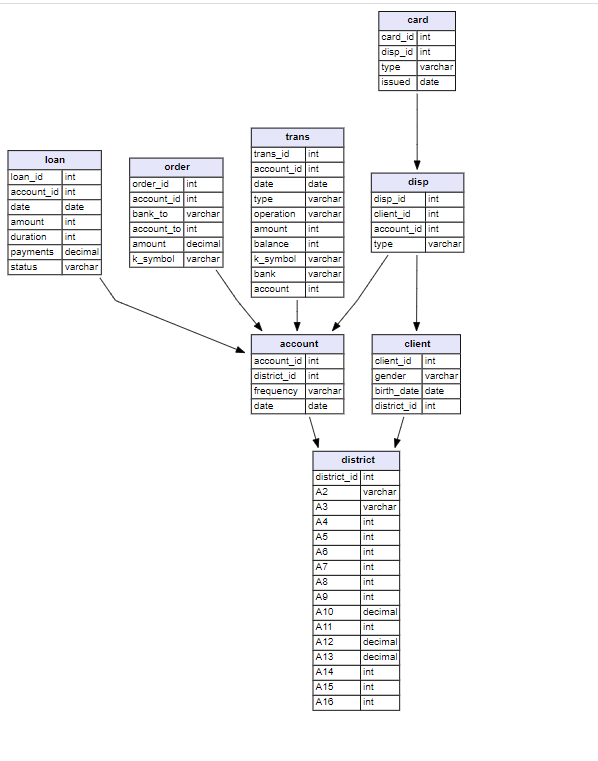

# Tables 
### account_df , card_df , disp_df , district_df , client_df , order_df ,loan_df , trans_df

## Study the account_df table 

In [14]:
account_df.head()

,account_id,district_id,frequency,date
0,1,18,POPLATEK MESICNE,1995-03-24
1,2,1,POPLATEK MESICNE,1993-02-26
2,3,5,POPLATEK MESICNE,1997-07-07
3,4,12,POPLATEK MESICNE,1996-02-21
4,5,15,POPLATEK MESICNE,1997-05-30


In [15]:
# covert date from st to datetime 
account_df['date'] = pd.to_datetime(account_df.date)

In [16]:
sub = {"POPLATEK MESICNE": 'monthly issuance',
"POPLATEK TYDNE": 'weekly issuance',
"POPLATEK PO OBRATU": 'issuance after transaction'}

In [17]:
# rename the values in frequency column 
account_df.frequency = account_df.frequency.map(sub)

In [18]:
# chick if there is null and check the data type
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   account_id   4500 non-null   int64         
 1   district_id  4500 non-null   int64         
 2   frequency    4500 non-null   object        
 3   date         4500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 140.8+ KB


In [19]:
account_df.head()

,account_id,district_id,frequency,date
0,1,18,monthly issuance,1995-03-24
1,2,1,monthly issuance,1993-02-26
2,3,5,monthly issuance,1997-07-07
3,4,12,monthly issuance,1996-02-21
4,5,15,monthly issuance,1997-05-30


In [20]:
account_df.frequency.unique()

array(['monthly issuance', 'weekly issuance',
       'issuance after transaction'], dtype=object)

In [21]:
#see how many account for each category
account_df.frequency.value_counts()

monthly issuance              4167
weekly issuance                240
issuance after transaction      93
Name: frequency, dtype: int64

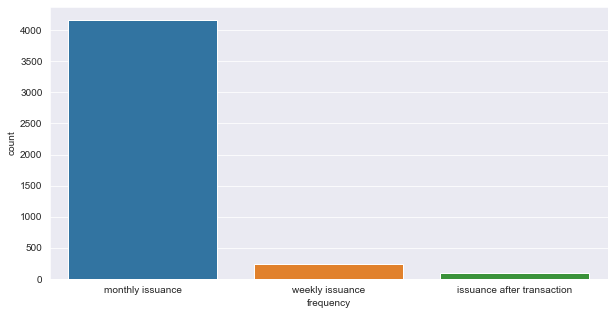

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.grid(linestyle='-')
sns.countplot(x= 'frequency' , data=account_df)
plt.show()

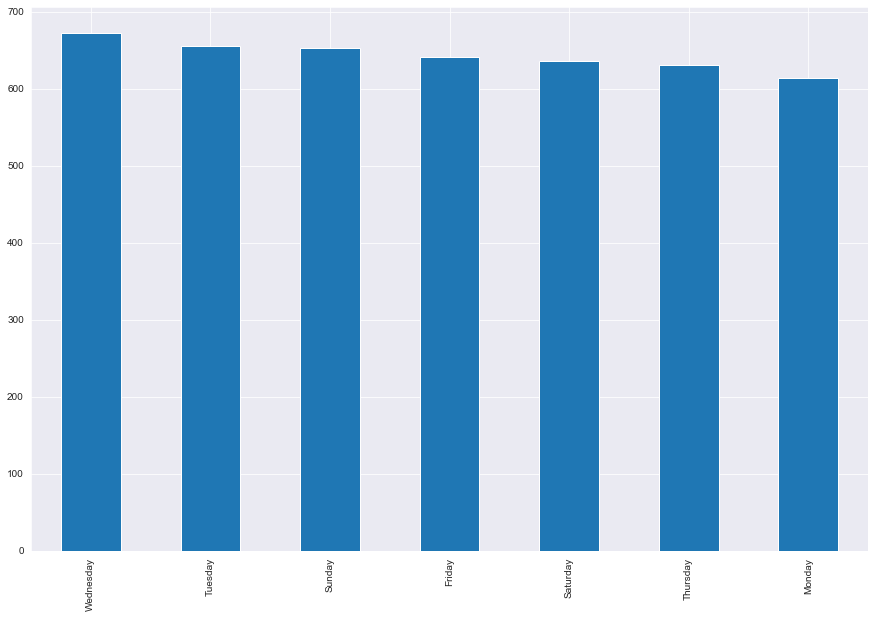

In [23]:
# see what is the busiest day of the week for new accounts
plt.figure(figsize=(15,10))
account_df.date.dt.day_name().value_counts().plot(kind='bar')
plt.show()

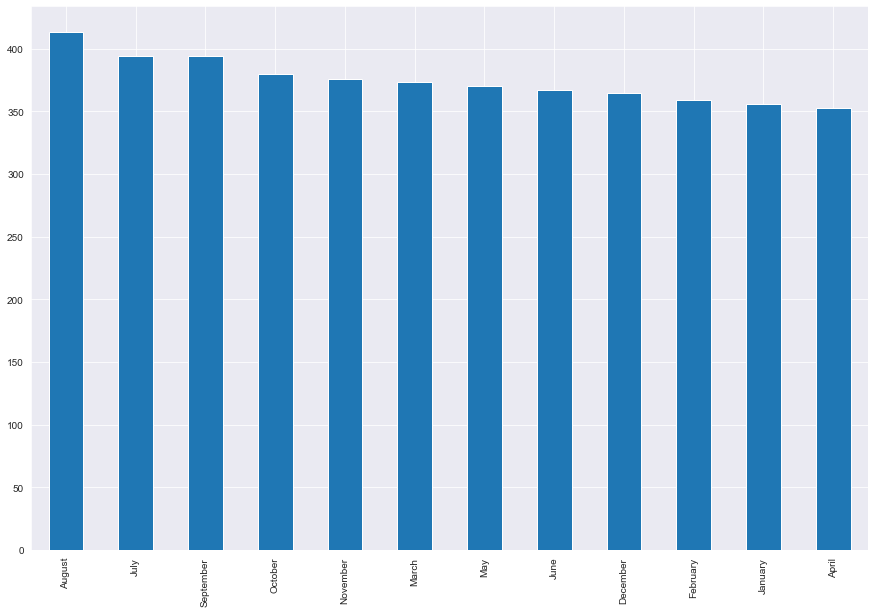

In [24]:
#see what is the busiest month of the year for new accounts
plt.figure(figsize=(15,10))
account_df.date.dt.month_name().value_counts().plot(kind='bar')
plt.show()

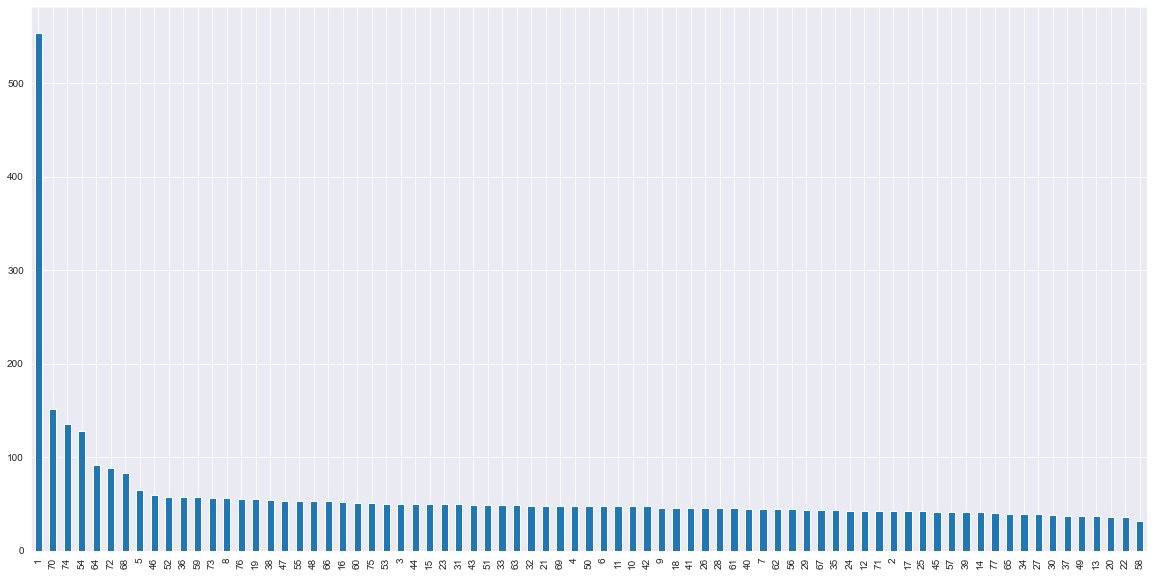

In [25]:
# see what is the best district for creating new accounts 
plt.figure(figsize=(20,10))
account_df.district_id.value_counts().plot(kind='bar')
plt.show()

## Study the card_df table 

In [26]:
card_df.head()

,card_id,disp_id,type,issued
0,1,9,gold,1998-10-16
1,2,19,classic,1998-03-13
2,3,41,gold,1995-09-03
3,4,42,classic,1998-11-26
4,5,51,junior,1995-04-24


In [27]:
card_df.issued = pd.to_datetime(card_df.issued)

In [28]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   card_id  892 non-null    int64         
 1   disp_id  892 non-null    int64         
 2   type     892 non-null    object        
 3   issued   892 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 28.0+ KB


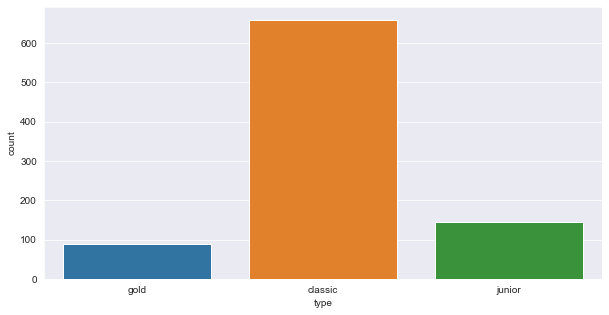

,type
type,
classic,659
gold,88
junior,145


In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='type' , data=card_df  )
plt.show()
card_df[['card_id','type']].groupby('type').agg({'type' :'count'})

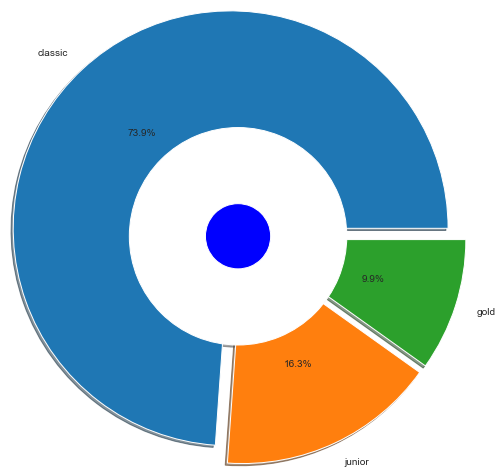

In [30]:
plt.figure(figsize=(7,5))
plt.pie(card_df.type.value_counts() ,labels=['classic','junior','gold'],autopct='%0.1f%%',radius=2,shadow=True ,explode=(0.1,0.1,0.1))
plt.pie([4],colors='w',radius=1,shadow=True)
plt.pie([4],colors='b',radius=0.3,shadow=True)
plt.show()

## Study the disp_df table 

In [31]:
disp_df.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [32]:
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


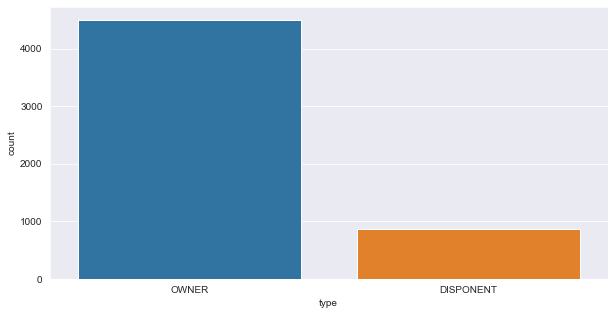

,type
type,
DISPONENT,869
OWNER,4500


In [33]:
# chick disposition to an accounts
plt.figure(figsize=(10,5))
sns.countplot(x='type' , data=disp_df )
plt.show()
disp_df[['disp_id','type']].groupby('type').agg({'type' :'count'})

   ## Study the district_df table 

In [35]:
district_df

,district_id,district name,region,no. of inhabitants,no_of_municipalities_inhabitants < 499,no_municipalities_inhabitants 500-1999,no_municipalities_inhabitants 2000-9999,no_municipalities with inhabitants >10000,no_cities,ratio_urban_inhabitants,avg_salary,unemploymant_rate_95,unemploymant_rate_96,no_enterpreneurs_per_1000_inhabitants,no_commited_crimes_95,no_of_commited_crimes_96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.6,1.85,132,2159.0,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.9,2.21,111,2824.0,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.6,5.05,109,5244.0,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.8,4.43,118,2616.0,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.3,3.74,90,4355.0,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.7,5.44,100,18782.0,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.3,5.66,99,4063.0,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.7,5.88,107,3736.0,2807


In [36]:
district_df.describe()

,district_id,no. of inhabitants,no_of_municipalities_inhabitants < 499,no_municipalities_inhabitants 500-1999,no_municipalities_inhabitants 2000-9999,no_municipalities with inhabitants >10000,no_cities,avg_salary,no_enterpreneurs_per_1000_inhabitants,no_commited_crimes_95,no_of_commited_crimes_96
count,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,77.000000
mean,39.000000,1.338849e+05,48.623377,24.324675,6.272727,1.727273,6.259740,9031.675325,116.129870,4850.315789,5030.831169
std,22.371857,1.369135e+05,32.741829,12.780991,4.015222,1.008338,2.435497,790.202347,16.608773,9888.951933,11270.796786
min,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,8110.000000,81.000000,818.000000,888.000000
25%,20.000000,8.585200e+04,22.000000,16.000000,4.000000,1.000000,5.000000,8512.000000,105.000000,2029.750000,2122.000000
50%,39.000000,1.088710e+05,49.000000,25.000000,6.000000,2.000000,6.000000,8814.000000,113.000000,2932.000000,3040.000000
75%,58.000000,1.390120e+05,71.000000,32.000000,8.000000,2.000000,8.000000,9317.000000,126.000000,4525.500000,4595.000000
max,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,12541.000000,167.000000,85677.000000,99107.000000


In [42]:
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   district_id                                77 non-null     int64  
 1   district name                              77 non-null     object 
 2   region                                     77 non-null     object 
 3   no. of inhabitants                         77 non-null     int64  
 4   no_of_municipalities_inhabitants < 499     77 non-null     int64  
 5   no_municipalities_inhabitants 500-1999     77 non-null     int64  
 6   no_municipalities_inhabitants 2000-9999    77 non-null     int64  
 7   no_municipalities with inhabitants >10000  77 non-null     int64  
 8   no_cities                                  77 non-null     int64  
 9   ratio_urban_inhabitants                    77 non-null     object 
 10  avg_salary                  

In [45]:
district_df.isna().sum()

district_id                                  0
district name                                0
region                                       0
no. of inhabitants                           0
no_of_municipalities_inhabitants < 499       0
no_municipalities_inhabitants 500-1999       0
no_municipalities_inhabitants 2000-9999      0
no_municipalities with inhabitants >10000    0
no_cities                                    0
ratio_urban_inhabitants                      0
avg_salary                                   0
unemploymant_rate_95                         1
unemploymant_rate_96                         0
no_enterpreneurs_per_1000_inhabitants        0
no_commited_crimes_95                        1
no_of_commited_crimes_96                     0
dtype: int64

In [57]:
district_df[district_df['unemploymant_rate_95'].isnull()]

,district_id,district name,region,no. of inhabitants,no_of_municipalities_inhabitants < 499,no_municipalities_inhabitants 500-1999,no_municipalities_inhabitants 2000-9999,no_municipalities with inhabitants >10000,no_cities,ratio_urban_inhabitants,avg_salary,unemploymant_rate_95,unemploymant_rate_96,no_enterpreneurs_per_1000_inhabitants,no_commited_crimes_95,no_of_commited_crimes_96
68,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,None,7.01,124,NaN,1358


In [58]:
round(district_df['no_commited_crimes_95'].mean(),0)

4850.0

In [59]:
district_df.fillna({'unemploymant_rate_95': round(district_df['unemploymant_rate_95'].mean(),1),
                   'no_commited_crimes_95': round(district_df['no_commited_crimes_95'].mean(),0)} , inplace=True )

In [60]:
district_df.isnull().sum()

district_id                                  0
district name                                0
region                                       0
no. of inhabitants                           0
no_of_municipalities_inhabitants < 499       0
no_municipalities_inhabitants 500-1999       0
no_municipalities_inhabitants 2000-9999      0
no_municipalities with inhabitants >10000    0
no_cities                                    0
ratio_urban_inhabitants                      0
avg_salary                                   0
unemploymant_rate_95                         0
unemploymant_rate_96                         0
no_enterpreneurs_per_1000_inhabitants        0
no_commited_crimes_95                        0
no_of_commited_crimes_96                     0
dtype: int64

In [61]:
district_df.head()

,district_id,district name,region,no. of inhabitants,no_of_municipalities_inhabitants < 499,no_municipalities_inhabitants 500-1999,no_municipalities_inhabitants 2000-9999,no_municipalities with inhabitants >10000,no_cities,ratio_urban_inhabitants,avg_salary,unemploymant_rate_95,unemploymant_rate_96,no_enterpreneurs_per_1000_inhabitants,no_commited_crimes_95,no_of_commited_crimes_96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.6,1.85,132,2159.0,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.9,2.21,111,2824.0,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.6,5.05,109,5244.0,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.8,4.43,118,2616.0,3040


,no. of inhabitants
region,
Prague,1204953
central Bohemia,1105234
east Bohemia,1234781
north Bohemia,1178977
north Moravia,1970302
south Bohemia,700595
south Moravia,2054989
west Bohemia,859306


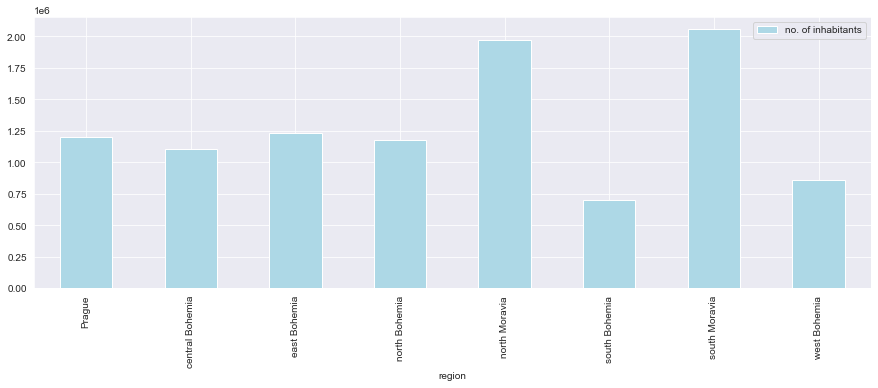

In [62]:
district_df[['region','no. of inhabitants']].groupby('region').agg({'no. of inhabitants' :'sum'}).plot(kind='bar' ,color=['lightblue'] , figsize=(15,5))
district_df[['region','no. of inhabitants']].groupby('region').agg({'no. of inhabitants' :'sum'})

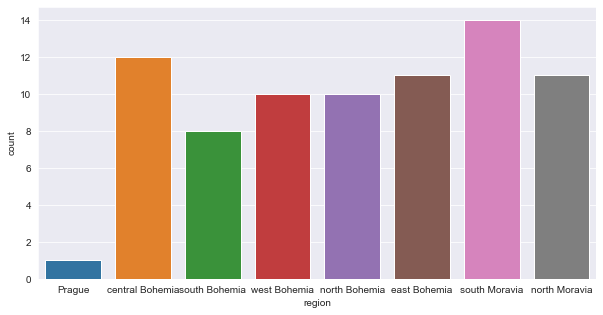

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'region'  , data=district_df  )
plt.show()

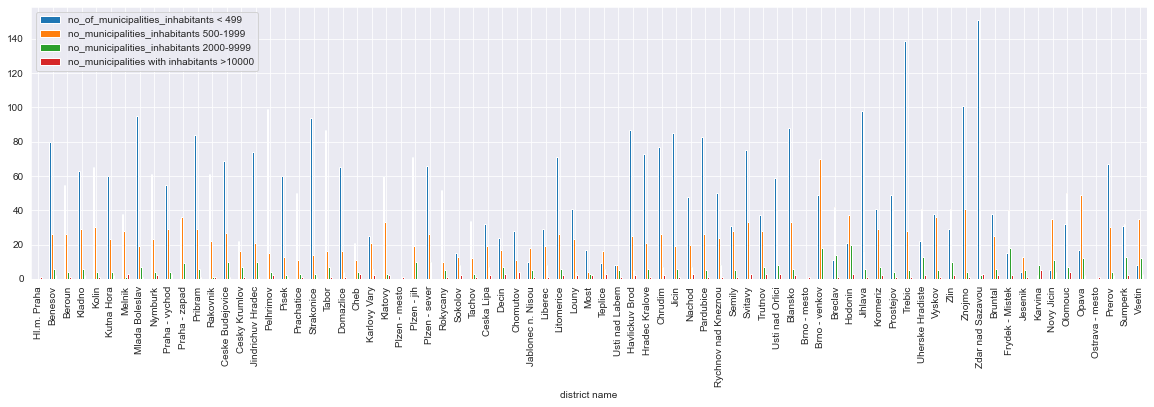

In [64]:
district_df[['district name',
       'no_of_municipalities_inhabitants < 499',
       'no_municipalities_inhabitants 500-1999',
       'no_municipalities_inhabitants 2000-9999',
       'no_municipalities with inhabitants >10000']].set_index('district name').plot(kind='bar',figsize=(20,5))
plt.show()

In [65]:
district_df.columns

Index(['district_id', 'district name', 'region', 'no. of inhabitants',
       'no_of_municipalities_inhabitants < 499',
       'no_municipalities_inhabitants 500-1999',
       'no_municipalities_inhabitants 2000-9999',
       'no_municipalities with inhabitants >10000', 'no_cities',
       'ratio_urban_inhabitants', 'avg_salary', 'unemploymant_rate_95',
       'unemploymant_rate_96', 'no_enterpreneurs_per_1000_inhabitants',
       'no_commited_crimes_95', 'no_of_commited_crimes_96'],
      dtype='object')

   ## Study the client_df table 

In [66]:
client_df.head()

,client_id,gender,birth_date,district_id
0,1,F,1970-12-13,18
1,2,M,1945-02-04,1
2,3,F,1940-10-09,1
3,4,M,1956-12-01,5
4,5,F,1960-07-03,5


In [67]:
client_df.birth_date = pd.to_datetime(client_df.birth_date)

In [68]:
client_df.gender = pd.Categorical(client_df.gender)

In [69]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   client_id    5369 non-null   int64         
 1   gender       5369 non-null   category      
 2   birth_date   5369 non-null   datetime64[ns]
 3   district_id  5369 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 131.3 KB


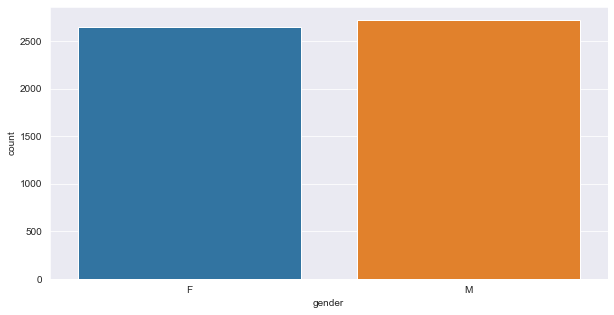

,gender
M,2724
F,2645


In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender' , data=client_df )
plt.show()
pd.DataFrame(client_df.gender.value_counts())

In [71]:
client_district = pd.merge(client_df , district_df , on = 'district_id')

In [72]:
client_district[['client_id','gender','birth_date','district name']].sort_values('district name')

,client_id,gender,birth_date,district name
3835,2325,F,1955-02-03,Benesov
3858,4655,M,1947-10-14,Benesov
3857,4654,F,1950-02-15,Benesov
3856,4651,M,1979-01-24,Benesov
3855,4589,F,1976-09-15,Benesov
...,...,...,...,...
4275,1929,F,1955-08-15,Znojmo
4276,2146,M,1973-01-04,Znojmo
4277,2673,M,1959-07-16,Znojmo
4269,1287,F,1944-08-09,Znojmo


   ## Study the order_df table 

In [73]:
order_df

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,SIPO
6467,46335,11362,MN,78507822,56.0,
6468,46336,11362,ST,40799850,330.0,POJISTNE
6469,46337,11362,KL,20009470,129.0,


In [74]:
order_df.bank_to = pd.Categorical(order_df.bank_to)

In [75]:
order_df.k_symbol = pd.Categorical(order_df.k_symbol)

In [76]:
symb = {"POJISTNE" : 'insurrance payment',
"SIPO": "household payment",
"LEASING": 'leasing',
"UVER" : 'loan payment'}

In [77]:
order_df.k_symbol = order_df.k_symbol.map(symb)

In [78]:
order_df.k_symbol.fillna('Other' , inplace=True)

In [79]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   order_id    6471 non-null   int64   
 1   account_id  6471 non-null   int64   
 2   bank_to     6471 non-null   category
 3   account_to  6471 non-null   int64   
 4   amount      6471 non-null   object  
 5   k_symbol    6471 non-null   object  
dtypes: category(1), int64(3), object(2)
memory usage: 259.9+ KB


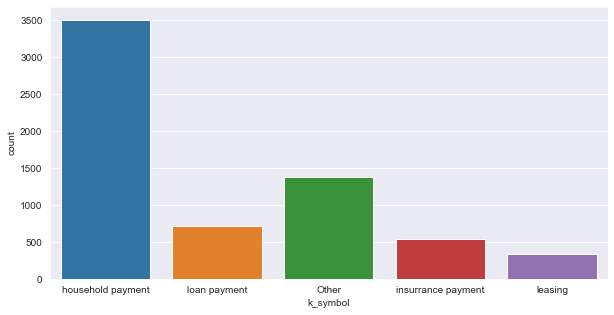

,k_symbol
household payment,3502
Other,1379
loan payment,717
insurrance payment,532
leasing,341


In [80]:
plt.figure(figsize=(10,5))
sns.countplot(x='k_symbol' , data=order_df )
plt.show()
pd.DataFrame(order_df.k_symbol.value_counts())

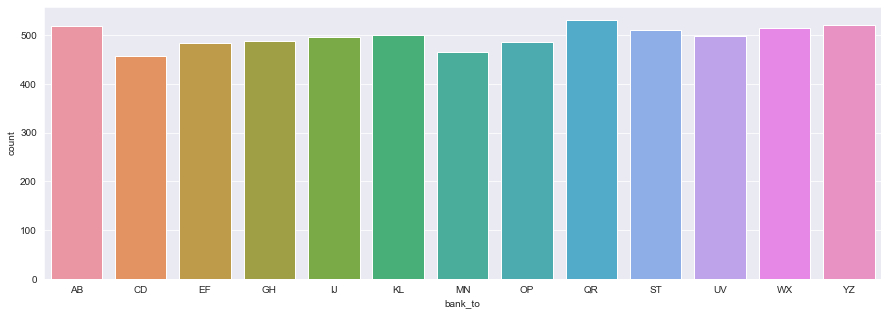

,bank_to
QR,531
YZ,521
AB,519
WX,515
ST,511
KL,500
UV,499
IJ,496
GH,487
OP,485


In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x='bank_to' , data=order_df )
plt.show()
pd.DataFrame(order_df.bank_to.value_counts())

   ## Study the trans_df table 

In [82]:
trans_df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,PRIJEM,VKLAD,1000,1000,None,None,NaN
1,5,1,1995-04-13,PRIJEM,PREVOD Z UCTU,3679,4679,None,AB,41403269.0
2,6,1,1995-05-13,PRIJEM,PREVOD Z UCTU,3679,20977,None,AB,41403269.0
3,7,1,1995-06-13,PRIJEM,PREVOD Z UCTU,3679,26835,None,AB,41403269.0
4,8,1,1995-07-13,PRIJEM,PREVOD Z UCTU,3679,30415,None,AB,41403269.0


In [83]:
trans_df.date = pd.to_datetime(trans_df.date)

In [84]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   trans_id    1056320 non-null  int64         
 1   account_id  1056320 non-null  int64         
 2   date        1056320 non-null  datetime64[ns]
 3   type        1056320 non-null  object        
 4   operation   873206 non-null   object        
 5   amount      1056320 non-null  int64         
 6   balance     1056320 non-null  int64         
 7   k_symbol    574439 non-null   object        
 8   bank        273508 non-null   object        
 9   account     295389 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 80.6+ MB


In [85]:
trans_df.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64

In [86]:
trans_df.operation.unique()

array(['VKLAD', 'PREVOD Z UCTU', 'PREVOD NA UCET', 'VYBER',
       'VYBER KARTOU', None], dtype=object)

In [87]:
trans_df.operation = trans_df.operation.map({"VYBER KARTOU" :'credit card withdrawal' ,
                                             "VKLAD": 'credit in cash',
                                             "PREVOD Z UCTU": 'collection from another bank',
                                             "VYBER": 'withdrawal in cash',"PREVOD NA UCET": 'remittance to another bank' ,
                                             None :'Other'} )

In [88]:
trans_df.operation = pd.Categorical(trans_df.operation)

In [89]:
trans_df.k_symbol.unique()

array([None, 'SIPO', 'SLUZBY', 'UVER', ' ', 'POJISTNE', 'DUCHOD', 'UROK',
       'SANKC. UROK'], dtype=object)

In [90]:
trans_df.k_symbol = trans_df.k_symbol.map({"POJISTNE":'insurrance payment',
                       "SLUZBY" :'payment for statement',
                       "UROK":'interest credited',
                       "SANKC. UROK":'sanction interest if negative balance',
                       "SIPO" : 'household',
                       "DUCHOD" :'old_age pension',
                       None :'Other',' ' : 'Other',
                       "UVER" :'loan payment'})

In [91]:
trans_df.k_symbol = pd.Categorical(trans_df.k_symbol)

In [92]:
trans_df.bank.unique()

array([None, 'AB', 'YZ', 'ST', 'QR', 'WX', 'CD', 'UV', 'KL', 'GH', 'OP',
       'IJ', 'EF', 'MN'], dtype=object)

In [93]:
trans_df.bank.fillna('Internal' , inplace=True)

In [94]:
trans_df.bank = pd.Categorical(trans_df.bank)

In [95]:
trans_df[['type','operation']][trans_df.type == 'VYBER']

,type,operation
396,VYBER,withdrawal in cash
397,VYBER,withdrawal in cash
398,VYBER,withdrawal in cash
399,VYBER,withdrawal in cash
400,VYBER,withdrawal in cash
...,...,...
871515,VYBER,withdrawal in cash
871516,VYBER,withdrawal in cash
871517,VYBER,withdrawal in cash
871518,VYBER,withdrawal in cash


In [96]:
trans_df.type.replace({"PRIJEM" :'credit',"VYDAJ" : 'withdrawal' ,'VYBER':'NOT SURE' } ,inplace=True)

In [97]:
trans_df.type = pd.Categorical(trans_df.type)

In [98]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   trans_id    1056320 non-null  int64         
 1   account_id  1056320 non-null  int64         
 2   date        1056320 non-null  datetime64[ns]
 3   type        1056320 non-null  category      
 4   operation   1056320 non-null  category      
 5   amount      1056320 non-null  int64         
 6   balance     1056320 non-null  int64         
 7   k_symbol    1056320 non-null  category      
 8   bank        1056320 non-null  category      
 9   account     295389 non-null   float64       
dtypes: category(4), datetime64[ns](1), float64(1), int64(4)
memory usage: 52.4 MB


In [99]:
trans_df.head(15)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,credit,credit in cash,1000,1000,Other,Internal,NaN
1,5,1,1995-04-13,credit,collection from another bank,3679,4679,Other,AB,41403269.0
2,6,1,1995-05-13,credit,collection from another bank,3679,20977,Other,AB,41403269.0
3,7,1,1995-06-13,credit,collection from another bank,3679,26835,Other,AB,41403269.0
4,8,1,1995-07-13,credit,collection from another bank,3679,30415,Other,AB,41403269.0
5,9,1,1995-08-13,credit,collection from another bank,3679,28903,Other,AB,41403269.0
6,10,1,1995-09-13,credit,collection from another bank,3679,22714,Other,AB,41403269.0
7,11,1,1995-10-13,credit,collection from another bank,3679,23318,Other,AB,41403269.0
8,12,1,1995-11-13,credit,collection from another bank,3679,21721,Other,AB,41403269.0
9,13,1,1995-12-13,credit,collection from another bank,3679,20249,Other,AB,41403269.0


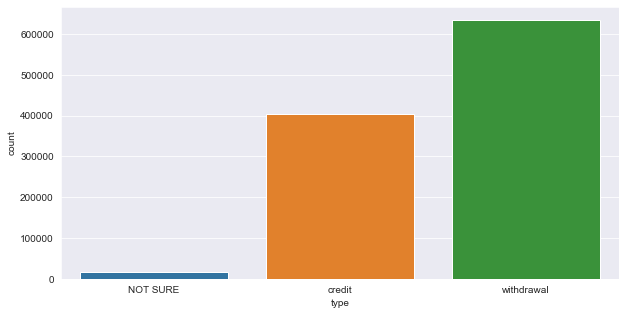

,type
withdrawal,634571
credit,405083
NOT SURE,16666


In [100]:
plt.figure(figsize=(10,5))
sns.countplot(x='type' , data=trans_df )
plt.show()
pd.DataFrame(trans_df.type.value_counts())

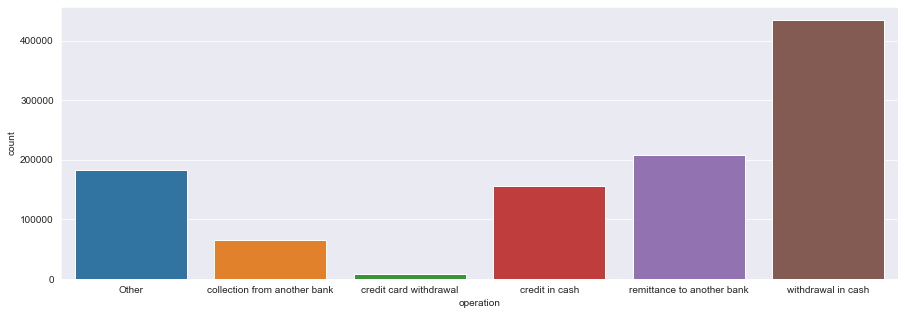

,operation
withdrawal in cash,434918
remittance to another bank,208283
Other,183114
credit in cash,156743
collection from another bank,65226
credit card withdrawal,8036


In [101]:
plt.figure(figsize=(15,5))
sns.countplot(x='operation' , data=trans_df )
plt.show()
pd.DataFrame(trans_df.operation.value_counts())

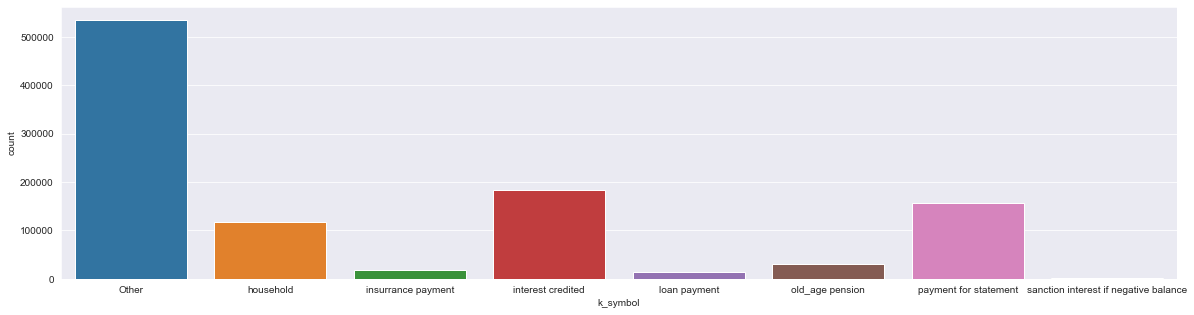

,k_symbol
Other,535314
interest credited,183114
payment for statement,155832
household,118065
old_age pension,30338
insurrance payment,18500
loan payment,13580
sanction interest if negative balance,1577


In [102]:
plt.figure(figsize=(20,5))
sns.countplot(x='k_symbol' , data=trans_df )
plt.show()
pd.DataFrame(trans_df.k_symbol.value_counts())

In [103]:
pd.DataFrame(trans_df.bank.value_counts())

,bank
Internal,782812
QR,22285
AB,21720
ST,21711
YZ,21582
GH,21499
EF,21293
KL,21234
UV,21167
OP,21094


   ## Study the loan_df table 

In [104]:
loan_df

,loan_id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373.00,A
1,4961,19,1996-04-29,30276,12,2523.00,B
2,4962,25,1997-12-08,30276,12,2523.00,A
3,4967,37,1998-10-14,318480,60,5308.00,D
4,4968,38,1998-04-19,110736,48,2307.00,C
...,...,...,...,...,...,...,...
677,7294,11327,1998-09-27,39168,24,1632.00,C
678,7295,11328,1998-07-18,280440,60,4674.00,C
679,7304,11349,1995-10-29,419880,60,6998.00,C
680,7305,11359,1996-08-06,54024,12,4502.00,A


In [105]:
loan_df['date'] = pd.to_datetime(loan_df['date'])

In [106]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   loan_id     682 non-null    int64         
 1   account_id  682 non-null    int64         
 2   date        682 non-null    datetime64[ns]
 3   amount      682 non-null    int64         
 4   duration    682 non-null    int64         
 5   payments    682 non-null    object        
 6   status      682 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 37.4+ KB


In [107]:
stat={'A' :'contract finished, no problems',
'B' : 'contract finished, loan not payed',
'C' : 'running contract, OK so far',
'D':'running contract, client in debt'}

In [108]:
loan_df.status = loan_df.status.map(stat)

In [109]:
loan_df['status'] = pd.Categorical(loan_df['status'])

In [110]:
loan_df.date = pd.to_datetime(loan_df.date)

In [111]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   loan_id     682 non-null    int64         
 1   account_id  682 non-null    int64         
 2   date        682 non-null    datetime64[ns]
 3   amount      682 non-null    int64         
 4   duration    682 non-null    int64         
 5   payments    682 non-null    object        
 6   status      682 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(4), object(1)
memory usage: 32.9+ KB


In [112]:
loan_df.head()

,loan_id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373.00,"contract finished, no problems"
1,4961,19,1996-04-29,30276,12,2523.00,"contract finished, loan not payed"
2,4962,25,1997-12-08,30276,12,2523.00,"contract finished, no problems"
3,4967,37,1998-10-14,318480,60,5308.00,"running contract, client in debt"
4,4968,38,1998-04-19,110736,48,2307.00,"running contract, OK so far"


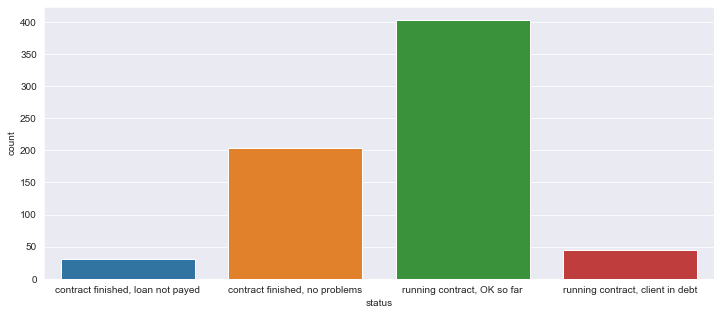

,status
"running contract, OK so far",403
"contract finished, no problems",203
"running contract, client in debt",45
"contract finished, loan not payed",31


In [113]:
plt.figure(figsize=(12,5))
sns.countplot(x='status' , data=loan_df )
plt.show()
pd.DataFrame(loan_df.status.value_counts())

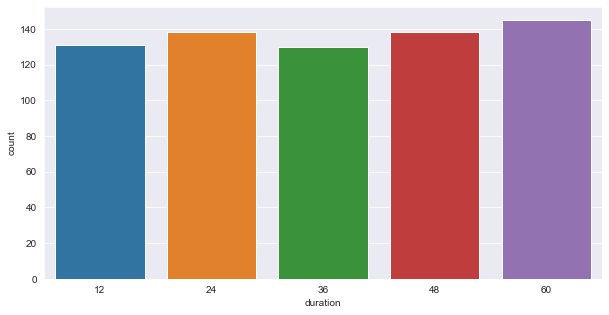

,duration
60,145
48,138
24,138
12,131
36,130


In [114]:
plt.figure(figsize=(10,5))
sns.countplot(x='duration' , data=loan_df )
plt.show()
pd.DataFrame(loan_df.duration.value_counts())

In [115]:
loan_df[loan_df.status == 'contract finished, loan not payed' ].sort_values('amount',ascending=False)

,loan_id,account_id,date,amount,duration,payments,status
352,6228,6034,1993-12-01,464520,60,7742.00,"contract finished, loan not payed"
124,5395,2176,1994-07-30,299088,36,8308.00,"contract finished, loan not payed"
354,6232,6051,1994-07-08,276660,36,7685.00,"contract finished, loan not payed"
360,6244,6118,1995-01-08,270648,36,7518.00,"contract finished, loan not payed"
506,6738,8566,1994-09-29,230220,36,6395.00,"contract finished, loan not payed"
603,7066,10131,1994-05-02,215388,36,5983.00,"contract finished, loan not payed"
38,5126,790,1994-07-24,208128,48,4336.00,"contract finished, loan not payed"
59,5176,1106,1994-11-12,192552,24,8023.00,"contract finished, loan not payed"
452,6594,7824,1994-09-28,189696,24,7904.00,"contract finished, loan not payed"
23,5045,347,1995-05-01,187224,24,7801.00,"contract finished, loan not payed"


In [116]:
loan_df[loan_df.status == 'running contract, client in debt' ].sort_values('amount',ascending=False)

,loan_id,account_id,date,amount,duration,payments,status
138,5447,2335,1997-11-12,541200,60,9020.00,"running contract, client in debt"
626,7142,10451,1994-12-19,482940,60,8049.00,"running contract, client in debt"
463,6625,7966,1997-09-07,473280,60,7888.00,"running contract, client in debt"
276,5976,4794,1997-12-27,465504,48,9698.00,"running contract, client in debt"
212,5731,3711,1997-11-05,460980,60,7683.00,"running contract, client in debt"
357,6237,6075,1998-01-06,407952,48,8499.00,"running contract, client in debt"
81,5282,1583,1996-08-24,388512,48,8094.00,"running contract, client in debt"
648,7209,10857,1997-11-30,385560,60,6426.00,"running contract, client in debt"
358,6239,6083,1997-09-28,360864,48,7518.00,"running contract, client in debt"
28,5063,442,1997-07-10,357840,48,7455.00,"running contract, client in debt"
